# Part II - (Prosper Loan Data Explanatory Analysis Presentation)
## by (Utibe Edet Bassey)


## Investigation Overview


I am interested in discovering features that directly and indirectly influence my main feature of interest (BorrowerAPR) so that intending borrowers can have a little idea of what to expect from Prosper marketplace. The features include ProsperRating_Combined (combination of CreditGrade and ProsperRating_Alpha), IncomeRange, Year, LoanStatus, and DebtToIncomeRatio among others. I started by investigating the distributions of BorrowerAPR, ProsperRating_Combined, IncomeRange, Year, Term, LoanStatus (for borrowers without a ProsperRating). After which I proceeded to discover relationships between pairs of the features used earlier. 
I further explored the relationships of 3 features to see if the addition of a third feature strengthened the relationship noticed. 



## Dataset Overview

The Prosper loan dataset contains information from over 113,000 loans from Prosper marketplace which is a peer-to-peer lending marketplace in the United States founded in 2005. The dataset consists of 113937 rows with 81 variables (columns) on each loan, including loan original amount, borrower rate, current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
#view of prosper data shape 
prosper.shape

(113937, 81)

In [4]:
#Data cleaning
#Rename the columns to valid Python variable names by eliminating the spaces and brackets so that dot notations can be used on the columns 
prosper.rename(columns={'ProsperRating (numeric)':'ProsperRating_numeric', 
                        'ProsperRating (Alpha)':'ProsperRating_Alpha',
                        'ListingCategory (numeric)':'ListingCategory_numeric',
                        'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent_percentage'}, inplace=True)

In [5]:
#replace NA with empty strings to be able to concantenate them
prosper['CreditGrade']= prosper['CreditGrade'].replace(np.nan, '')
prosper['ProsperRating_Alpha']= prosper['ProsperRating_Alpha'].replace(np.nan, '')

#Add the two columns into 1
prosper['ProsperRating_Combined']= prosper['CreditGrade'] + prosper['ProsperRating_Alpha']

In [6]:
# replace "" with nan to return them to their former state
prosper['ProsperRating_Combined'] = prosper['ProsperRating_Combined'].replace('', np.nan)
prosper.ProsperRating_Combined.value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
Name: ProsperRating_Combined, dtype: int64

In [7]:
#Convert ListingCreationDate to timestamp
prosper['ListingCreationDate']= pd.to_datetime(prosper['ListingCreationDate'])

In [8]:
# create a Year column and view the values 
prosper['Year'] = prosper.ListingCreationDate.dt.year
prosper['Year'].value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: Year, dtype: int64

In [9]:
#Columns I am interested in
columnsOfInterest= ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory_numeric', 
                    'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'PublicRecordsLast10Years',
                    'BankcardUtilization', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'Recommendations',
                    'Investors', 'ProsperRating_Combined', 'Year']

In [10]:
#create a new dataframe for only the interested columns
prosper_df = prosper.filter(columnsOfInterest)
prosper_df.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory_numeric,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,Recommendations,Investors,ProsperRating_Combined,Year
0,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0,Other,Self-employed,True,True,0.0,0.00,0.17,"$25,000-49,999",True,0,258,C,2007
1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,2,Professional,Employed,False,False,1.0,0.21,0.18,"$50,000-74,999",True,0,1,A,2014
2,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0,Other,Not available,False,True,0.0,NaN,0.06,Not displayed,True,0,41,HR,2007
3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,16,Skilled Labor,Employed,True,False,0.0,0.04,0.15,"$25,000-49,999",True,0,158,A,2012
4,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,2,Executive,Employed,True,False,0.0,0.81,0.26,"$100,000+",True,0,20,D,2013


For the income range of $0, I will assume that people who fall under this group are 'Volunteers' since they are not in the 'Not employed' Income range which means that they are employed but not paid.

In [11]:
#rename the values for the income ranges
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('$0','Volunteer')
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('$1-24,999','Very_low')
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('$25,000-49,999','Low')
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('$50,000-74,999','Moderate')
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('$75,000-99,999','Moderately_high')
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('$100,000+','High')
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('Not displayed','Not_displayed')
prosper_df['IncomeRange']= prosper_df.IncomeRange.replace('Not employed','Not_employed')

In [12]:
#Convert IncomeRange and ProsperRating_Combined to categorical variables 
#rearrange them from least to best 
# income classes
income_classes = ['Not_displayed', 'Not_employed', 'Volunteer', 'Very_low', 'Low',  'Moderate',  'Moderately_high', 'High']


# ProsperRating_Combined  classes
rating_classes = ['NC','HR','E','D','C','B','A','AA']


# Returns the types for cut_classes, color_classes,and clarity_classes  with the categories and orderedness
incomeclasses = pd.api.types.CategoricalDtype(ordered=True, categories=income_classes)
ratingclasses = pd.api.types.CategoricalDtype(ordered=True, categories=rating_classes)


# Use pandas.astype() to convert the "IncomeRange" and "ProsperRating_Combined" columns from a plain object type into an ordered categorical type 
prosper_df['IncomeRange'] = prosper_df['IncomeRange'].astype(incomeclasses)
prosper_df['ProsperRating_Combined'] = prosper_df['ProsperRating_Combined'].astype(ratingclasses);

In [13]:
#Remove the null values in order to plot the histogram
prosper_df = prosper_df[~prosper_df['BorrowerAPR'].isnull()]

# Describe the column
prosper_df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

## Distribution of BorrowerAPR

The distribution of the Borrower Annual Percentage Rate(BorrowerAPR) has a multimodal shape with its highest peak between 0.35 and 0.4. 

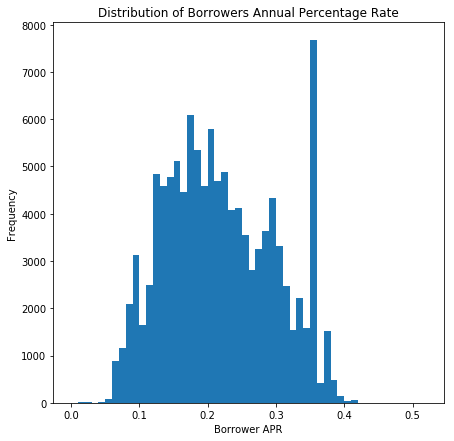

In [14]:
#histogram for Borrower APR
plt.figure(figsize=[7, 7])
# Set bin size
bins = np.arange(0, prosper_df['BorrowerAPR'].max()+0.01, 0.01)
#plot the histogram
plt.hist(data = prosper_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.title('Distribution of Borrowers Annual Percentage Rate')
plt.ylabel('Frequency');

## Distribution of ProsperRating_Combined

The Prosper 'C' rating has the highest frequency followed by the 'B' rating, 'NC' rating being this few is no surprise as this rating was used in pre-2009. The plot shows that Prosper rating 'AA' has the least frequency since 'NC' rating was stopped in July 2009.   

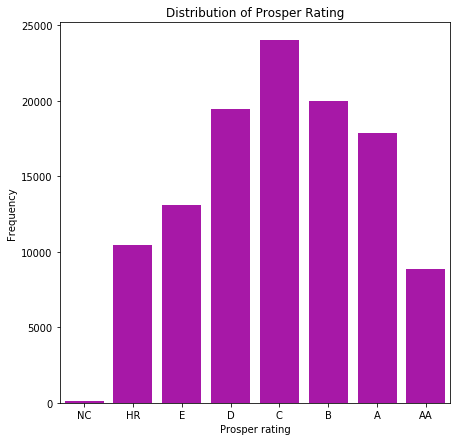

In [15]:
#Plot a bar chart for 'ProsperRating_Combined' column
plt.figure(figsize=[7, 7])
sb.countplot(data=prosper_df, x='ProsperRating_Combined', color='m')
plt.title('Distribution of Prosper Rating')
plt.xlabel('Prosper rating')
plt.ylabel('Frequency');

## Distribution of IncomeRange

Low (\\$25,000-49,999) income earners have the highest frequency followed closely by Moderate (\\$50,000-74,999) income earners which comes as surprise because I would have expected the lower income earners to have the high frequencies. 

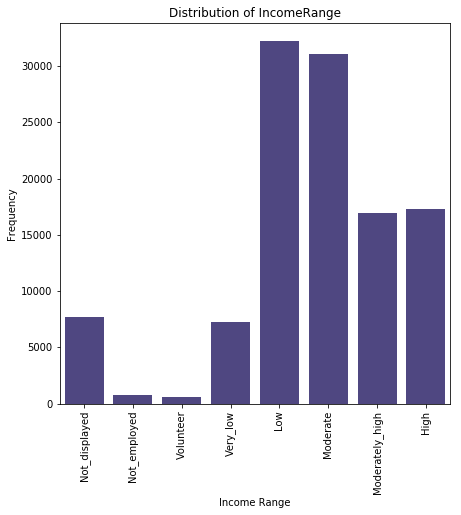

In [16]:
#Plot a bar chart for 'IncomeRange' column
plt.figure(figsize=[7, 7])
sb.countplot(data=prosper_df, x='IncomeRange', color='darkslateblue')
plt.xlabel("Income Range")
plt.ylabel('Frequency')
plt.xticks(rotation= 90)
plt.title('Distribution of IncomeRange');

## Distribution of Year

The distribution of year shows that from 2009 there was a consistent increase in borrowers with year 2013 almost doubling year 2012's size only to experience a great drop in the number of borrowers in year 2014.

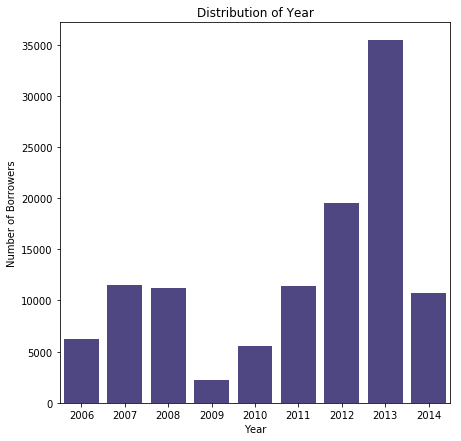

In [17]:
#Plot a bar chart for 'Year' column
plt.figure(figsize=[7, 7])
sb.countplot(data=prosper_df, x='Year', color='darkslateblue')
plt.xlabel("Year")
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Year');

## Distribution of Term

This shows that 36 months (3 years) term was the most term given to borrowers to repay loans.

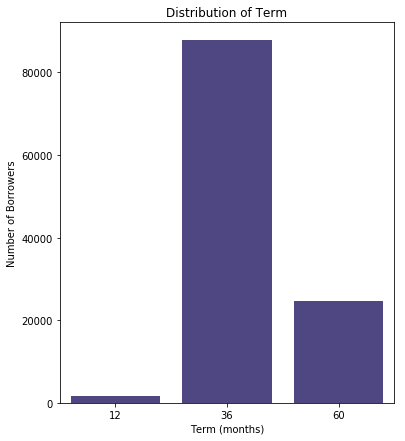

In [18]:
#Plot a bar chart for 'Term' column
plt.figure(figsize=[6, 7])
sb.countplot(data=prosper_df, x='Term', color='darkslateblue')
plt.xlabel("Term (months)")
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Term');

## How did borrowers without prosper rating fare in the status of their loan?

Borrowers without Prosper rating from Prosper were selected to determine if they were honest enough to complete their payment. The distribution shows that despite not having a prosper rating, majority of these borrowers completed their loan payment.

In [19]:
# select prosper rating with null values 
pros_null=prosper_df.loc[(prosper_df.ProsperRating_Combined.isnull())]
pros_null.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory_numeric,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,Recommendations,Investors,ProsperRating_Combined,Year
150,2008-06-12 11:59:55.217,36,Completed,0.08641,0.0830,7,Professional,Full-time,True,False,0.0,0.12,0.06,Moderate,True,0,290,NaN,2008
528,2009-04-28 14:08:57.100,36,Completed,0.17170,0.1500,1,Food Service,Full-time,True,False,0.0,0.16,0.26,Low,True,0,220,NaN,2009
725,2008-04-27 19:21:57.207,36,Completed,0.10082,0.0800,1,Food Service Management,Full-time,False,True,0.0,0.20,NaN,Very_low,False,1,120,NaN,2008
1977,2008-04-30 16:33:46.990,36,Completed,0.17291,0.1365,1,Other,Retired,False,True,1.0,0.08,0.11,Low,True,0,36,NaN,2008
3487,2008-06-11 16:48:13.620,36,Completed,0.16005,0.1385,2,Executive,Full-time,False,False,0.0,0.07,0.09,High,True,0,207,NaN,2008


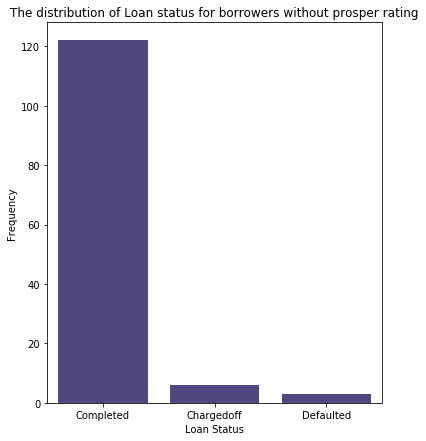

In [20]:
#Bar chart of null prosper rating on loan status
plt.figure(figsize=(6,7))
sb.countplot(data = pros_null, x = 'LoanStatus', color= 'darkslateblue')
plt.title('The distribution of Loan status for borrowers without prosper rating')
plt.ylabel('Frequency')
plt.xlabel('Loan Status');

## Does prosper rating affect Borrower's Annual percentage rate?

The relationship depicted in the boxplot between BorrowerAPR and ProsperRating_Combined shows a negative correlation. The higher a borrower's prosper rating is, the lower the BorrowerAPR given to the borrower with exemption to the No Credit ('NC') grade which was discontinued after July 2009. The median value decreases as the prosper rating increases.

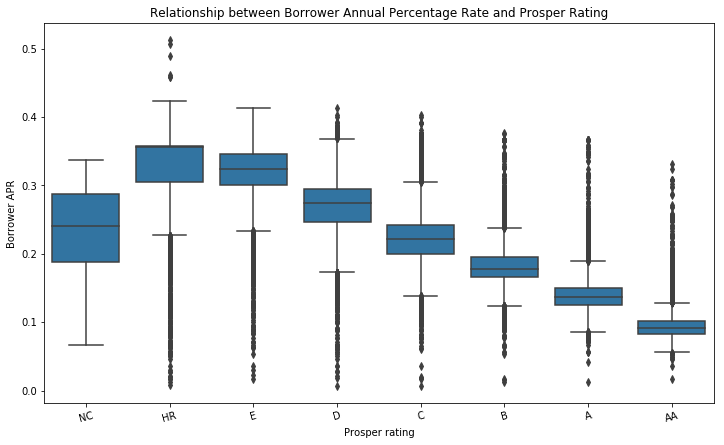

In [21]:
#Choose a base color
base_color = sb.color_palette()[0]

plt.figure(figsize=(12,7))
sb.boxplot(data=prosper_df, x='ProsperRating_Combined', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15)
plt.title('Relationship between Borrower Annual Percentage Rate and Prosper Rating') 
plt.ylabel('Borrower APR')
plt.xlabel('Prosper rating');

## Is BorrowerAPR the reason for the distribution observed in years 2013 and 2014?

The bar chart of Year in the Univariate section showed that from 2009 till 2013 there was steady increase in borrowers till 2014 where a great drop was experienced . 
This boxplot of BorrowerAPR versus Year shows an increase in BorrowerAPR from 2009 to 2011 and a decrease from 2012 to 2014. A further decrease in 2014 should have inceased the number of borrwers like it did in 2013 but it did not have any effect for 2014. So Year alone is not responsible for the observation.  

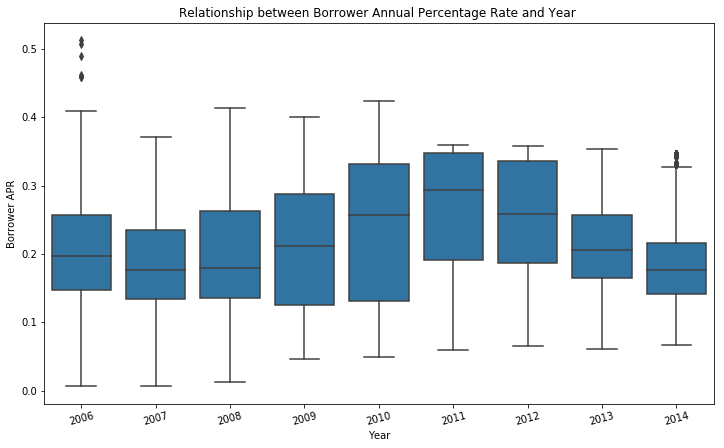

In [22]:
#Relationship between Borrower Annual Percentage Rate and Year 
plt.figure(figsize=(12,7))
sb.boxplot(data=prosper_df, x='Year', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15)
plt.title('Relationship between Borrower Annual Percentage Rate and Year ') 
plt.ylabel('Borrower APR')
plt.xlabel('Year');

## Does income range influence borrowerAPR?

Income range influences borrowerAPR. The borrowerAPR decreased as income range increased from Very_low to High income range (around 0.25-0.18). Though the frequency of Not_displayed was almost 8 times more than the frequency of Not_employed(in the Distribution of IncomeRange), lower borrowerAPR was given to those who didn't display their income (Not_displayed) and those who earned $0 (Volunteers) than the Not_employed.

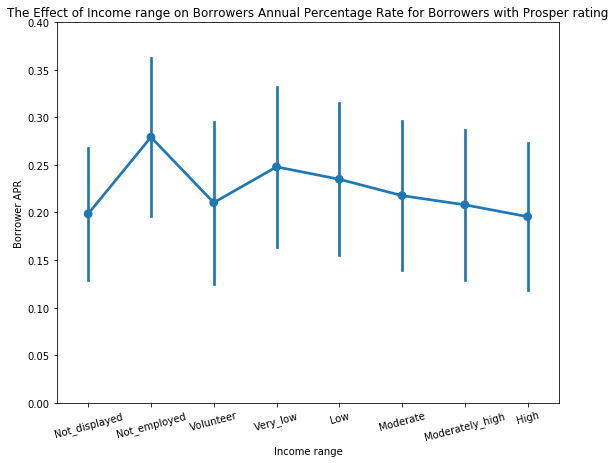

In [23]:
#plot a pointplot of IncomeRange against BorrowerAPR 
plt.figure(figsize=(9,7))
sb.pointplot(data=prosper_df, x='IncomeRange', y='BorrowerAPR', color=base_color, ci='sd')
plt.xticks(rotation=15)
plt.title('The Effect of Income range on Borrowers Annual Percentage Rate for Borrowers with Prosper rating')
plt.ylabel('Borrower APR')
plt.xlabel('Income range')
plt.ylim(0.0,0.40);

## What was the borrowerAPR of borrowers without prosper rating?

In the lineplot of IncomeRange against BorrowerAPR for Borrowers with Prosper rating I had noticed a consistent decrease in BorrowerAPR as IncomeRange increased from Very_low to High but that is not the same for people without Proser Rating as shown in this lineplot which has a sequence of high-to-low. I have also noticed that the BorrowerAPR for people without prosper rating are lower (around 0.16 and 0.23) for Very_low to High income range. They got low borrowerAPR despite not having prosper rating.

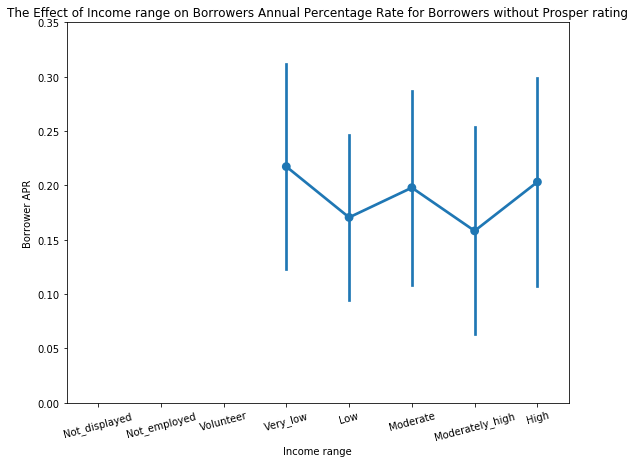

In [24]:
#Use income range of borrowers with null prosperrating_combined value to check their borrowerAPR 
plt.figure(figsize=(9,7))
sb.pointplot(data=pros_null, x='IncomeRange', y='BorrowerAPR', color=base_color, ci='sd')
plt.xticks(rotation=15)
plt.title('The Effect of Income range on Borrowers Annual Percentage Rate for Borrowers without Prosper rating')
plt.ylabel('Borrower APR')
plt.xlabel('Income range')
plt.ylim(0.0,0.35);

## What is the relationship between ProsperRating_Combined and DebtToIncomeRatio?

After noticing that Prosper rating affected BorrowerAPR, I plotted a barplot to determine if a higher DebtToIncomeRatio attracted a lower prosper rating. 
In the distribution of Prosper rating with respect to Debt-to-income rato, the DebtToIncomeRatio shows a weak negative correlation to ProsperRating_Coombined excluding the 'NC' rating which was discontinued after 2009. 

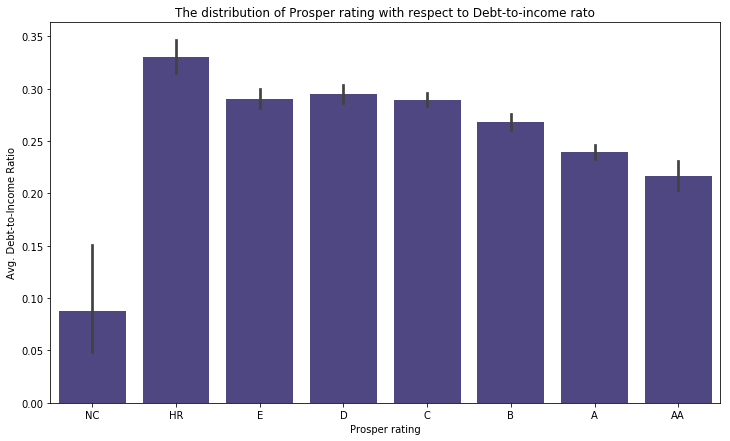

In [25]:
#plot a barplot for 'ProsperRating_Combined' and 'DebtToIncomeRatio'  
plt.figure(figsize=(12,7))
sb.barplot(data=prosper_df, x='ProsperRating_Combined', y='DebtToIncomeRatio', color='darkslateblue')
plt.title('The distribution of Prosper rating with respect to Debt-to-income rato')
plt.ylabel('Avg. Debt-to-Income Ratio')
plt.xlabel('Prosper rating');

## What was the reason for the distribution observed in years 2013 and 2014?

This plot shows the reason why 2013 size increased so much as the year experienced an influx of 'Not_displayed' and 'Not_employed' income range borrowers and also shows that no records of 'Not_displayed', 'Not_employed', and 'Volunteer' income range in 2014 is the reason for a great drop in 2014 (year 2014 has only 5 groups compared to 2013).

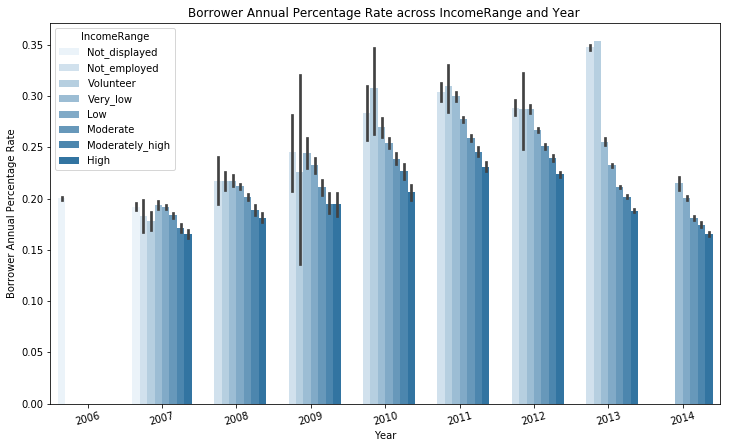

In [26]:
#barplot of Year, BorrowerAPR, and IncomeRange
plt.figure(figsize=(12,7))
sb.barplot(data=prosper_df, x='Year', y='BorrowerAPR', hue= 'IncomeRange', color=base_color)
plt.xticks(rotation=15)
plt.title('Borrower Annual Percentage Rate across IncomeRange and Year ') 
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Year');

## What is the relationship of Borrower Annual Percentage Rate across ProsperRating_Combined and IncomeRange?

In the distribution of Borrower Annual Percentage Rate across ProsperRating_Combined and IncomeRange, Borrowers with 'AA' ProsperRating_Combined value in each of the income range had the least borrowerAPR for its range. Apart from the Not_displayed and Volunteer IncomeRange there was a consistent decrease in BorrowerAPR as the ProsperRating_Combined value increased.

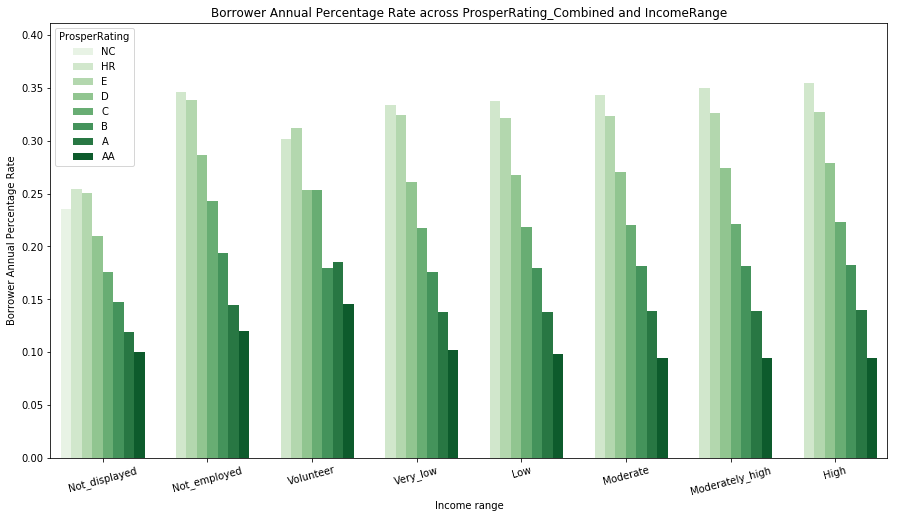

In [27]:
#barplot of Borrower Annual Percentage Rate across ProsperRating_Combined and IncomeRange
plt.figure(figsize=(15,8))
sb.barplot(data=prosper_df, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'ProsperRating_Combined', palette = 'Greens',
             ci='sd', errwidth=0)
plt.xticks(rotation=15)
plt.legend(loc='upper left', title='ProsperRating')
plt.title('Borrower Annual Percentage Rate across ProsperRating_Combined and IncomeRange')
plt.xlabel('Income range')
plt.ylabel('Borrower Annual Percentage Rate'); 

## What is the effect of IncomeRange across DebtToIncomeRatio and ProsperRating_Combined?

The Not_employed IncomeRange has the highest DebtToIncome ratio across 'HR' to 'AA' borrowers while the Voluteers surprisingly have no DebtToIncomeRatio.

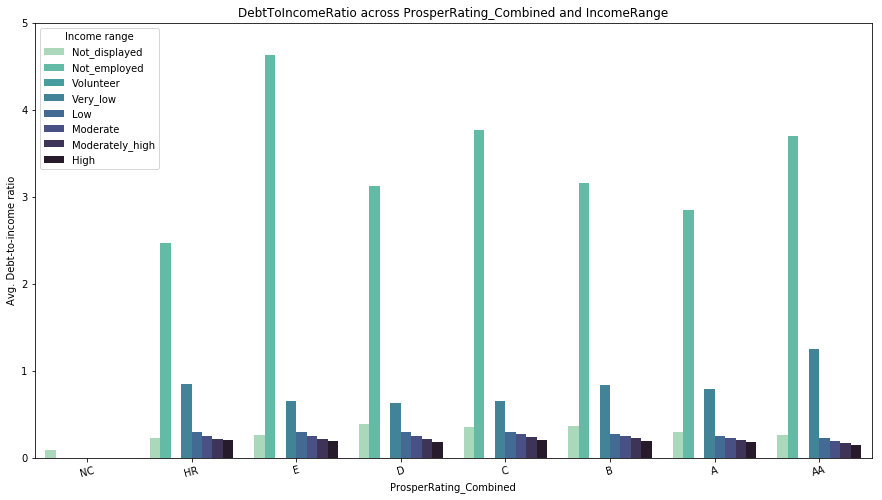

In [28]:
#barplot of Income range across DebtToIncomeRatio and ProsperRating_Combined
plt.figure(figsize=(15,8))
sb.barplot(data=prosper_df, x = 'ProsperRating_Combined', y = 'DebtToIncomeRatio', hue = 'IncomeRange', palette = 'mako_r',
             ci='sd', errwidth=0)
plt.xticks(rotation=15)
plt.legend(loc='upper left', title='Income range')
plt.title('DebtToIncomeRatio across ProsperRating_Combined and IncomeRange')
plt.xlabel('ProsperRating_Combined')
plt.ylabel('Avg. Debt-to-income ratio')
plt.ylim(0,5) ; 

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --template output-toggle.tpl --post serve  